In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

Text(0.5, 0, 'Effective $p$ ($t \\times p_0$)')

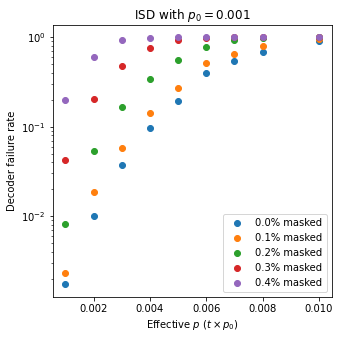

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(5,5), sharey=True)

df = pd.read_csv('./60_50_5_6/iterative_masked_decoding.res')
df['p_error'] = 1 - df['p_log']
df['p_std_dev'] = np.sqrt(df['p_error'] * df['p_log'] / df['no_test'])
# df['p_std_dev'].replace(to_replace=0, value=1e-2, inplace=True)
guesses = []
params = []

def fun(x, a, b):
        return 1 - np.exp(-(x*a)**b)

p_masks = [0.0, 0.1, 0.2, 0.3, 0.4]
for i, j in enumerate(p_masks):
    tmp_df = df[(df['p_mask'] == j) & (df['algo'] >= 100)]
    ax.scatter(tmp_df['p_phys'], tmp_df['p_error'], label=f'{j}% masked', marker='o')

    # popt, pcov = curve_fit(fun, tmp_df['algo']/1000, tmp_df['p_error'], maxfev=1000,
        # sigma=tmp_df['p_std_dev'])
    # print(j, popt, np.sqrt(np.diag(pcov)), r2_score(tmp_df['p_error'], fun(tmp_df['algo']/1000, *popt)))
    # params.append(popt[0])
    # xx = np.linspace(0.001, 3, 1000)
    # yy = fun(xx, *popt)
    # ax.plot(xx, yy)


# ax.plot(np.linspace(0, 0.05, 100), np.linspace(1e-3, 50*1e-3, 100), c='k')
# ax[1].plot(np.linspace(1e-3,1e-2,100), np.linspace(1e-3, 1e-2, 100), c='k')

ax.set_title('ISD with $p_0 = 0.001$')
# ax[1].set_title('SSF with $k=1$')
ax.legend(loc='lower right')
ax.set_yscale('log')
ax.set_ylabel('Decoder failure rate')
ax.set_xlabel('Effective $p$ ($t \\times p_0$)')
# ax[1].set_xlabel('$p$')

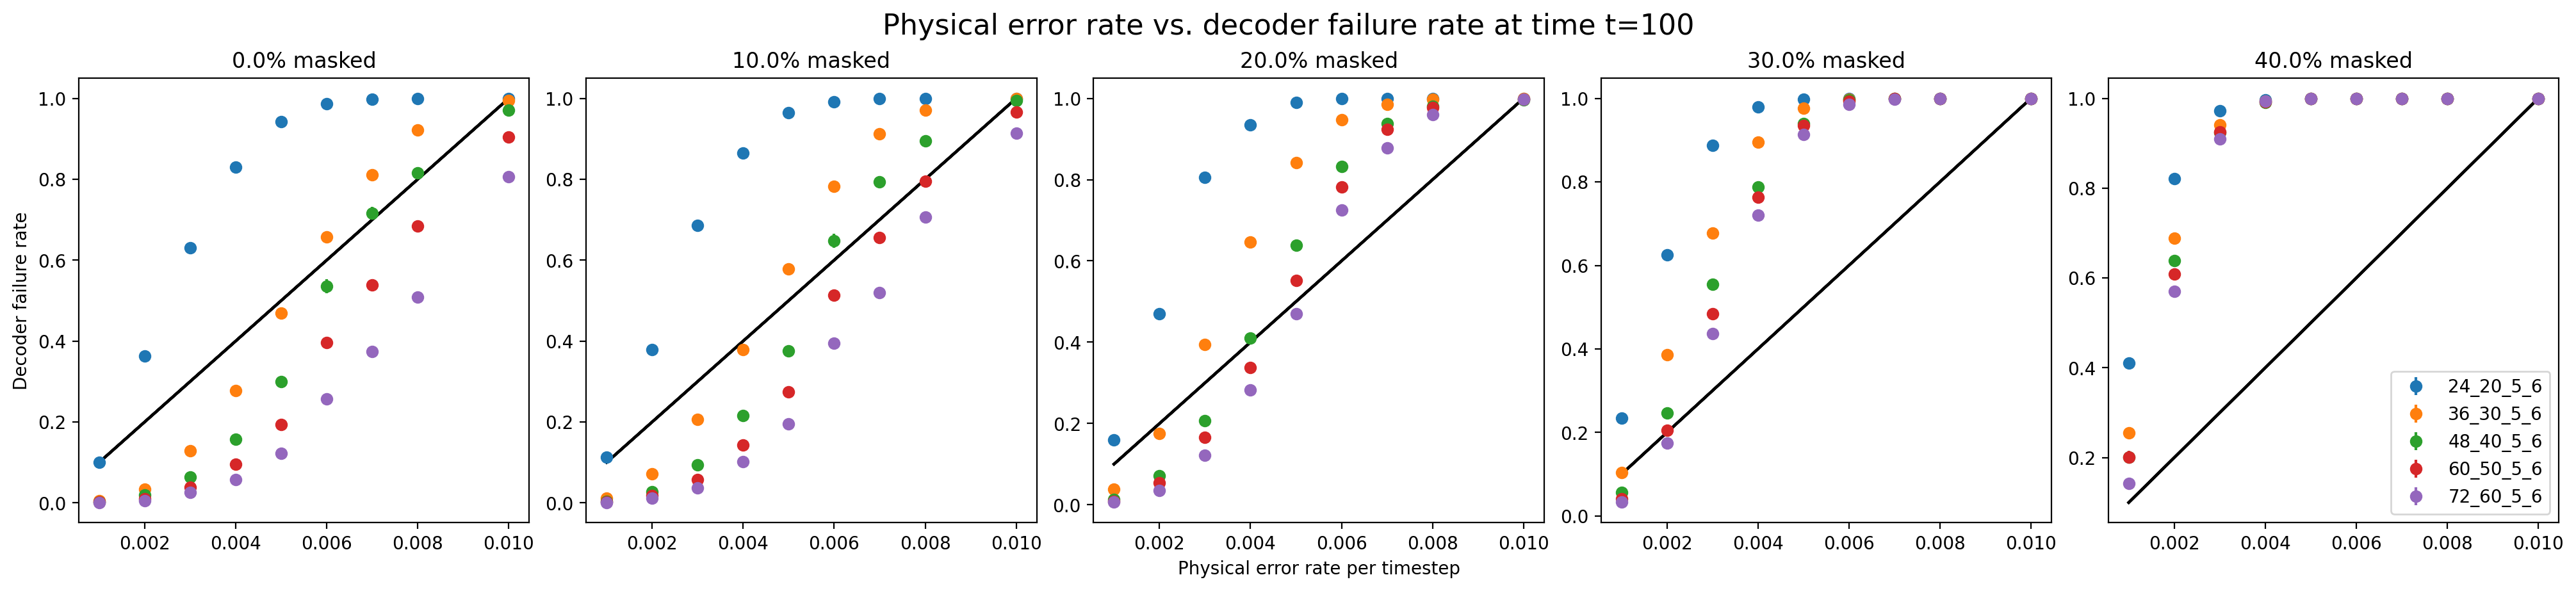

In [4]:
fig, ax = plt.subplots(1, len(p_masks), figsize=(4*len(p_masks),4.5), constrained_layout=True, dpi=200)

codes = [
    "24_20_5_6",
    # "30_25_5_6",
    "36_30_5_6",
    # "42_35_5_6",
    "48_40_5_6",
    "60_50_5_6",
    "72_60_5_6"
    # "84_70_5_6"
]

t = 100
# sched = "progressive_scheduling"
# sched = "naive_scheduling"

code_sizes = np.array([int(code[0:2])**2 + int(code[3:5])**2 for code in codes])


for i, p_mask in enumerate(p_masks):
    for j, code in enumerate(codes):
        df = pd.read_csv(f'./{code}/iterative_masked_decoding.res')
        df['p_error'] = 1 - df['p_log']
        df['p_std_dev'] = np.sqrt(df['p_error'] * df['p_log'] / df['no_test'])
        df = df[(df['algo'] == t) & (df['p_mask'] == p_mask)]

        ax[i].errorbar(df['p_phys'], df['p_error'], df['p_std_dev'], label=f"{codes[j]}", fmt='o')
        # ax[i].plot(df['p_phys'], df['p_error'], label=f"{codes[j]}")

        ax[i].set_title(f"{p_mask*100}% masked")
        ax[i].plot(np.linspace(0.001, 0.01, 100), np.linspace(0.001, 0.01, 100)*100, c='k')
        # ax[i].set_yscale('log')

ax[0].set_ylabel('Decoder failure rate')
ax[2].set_xlabel('Physical error rate per timestep')
fig.suptitle("Physical error rate vs. decoder failure rate at time t=100", fontsize=16)
plt.legend(loc='lower right')